Olennaiset taidot kuvailevaan analyysiin: https://wordpress.com/post/pythonaki.wordpress.com/397

In [1]:
#Tuon tarvittavat kirjastot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Luen datan dataframeen, jonka nimeksi annan df
df = pd.read_excel('http://taanila.fi/data1.xlsx', sheet_name = 'Data')

In [3]:
#Datan viisi ensimmäistä riviä
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
#Data viisi viimeistä riviä
df.tail()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN
81,82,2,35,2,3.0,15.0,2183,3,4.0,4,3,4,1.0,NaN,NaN,NaN


In [5]:
#Datan sarakkeet
df.columns

Index(['nro', 'sukup', 'ikä', 'perhe', 'koulutus', 'palveluv', 'palkka',
       'johto', 'työtov', 'työymp', 'palkkat', 'työteht', 'työterv', 'lomaosa',
       'kuntosa', 'hieroja'],
      dtype='object')

In [6]:
#Arvojen lukumäärät sarakkeissa
df.count()

nro         82
sukup       82
ikä         82
perhe       82
koulutus    81
palveluv    80
palkka      82
johto       82
työtov      81
työymp      82
palkkat     82
työteht     82
työterv     47
lomaosa     20
kuntosa      9
hieroja     22
dtype: int64

In [7]:
#Ainutkertaiset arvot sarakkeissa (myös puuttuvien arvojen lukumäärät selviävät tästä)
for var in df:
    print(var, np.unique(df[var]))

nro [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82]
sukup [1 2]
ikä [20 21 22 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 49 50 51 52 53 55 56 58 59 61]
perhe [1 2]
koulutus [ 1.  2.  3.  4. nan]
palveluv [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 27. 28. 35. 36. nan nan]
palkka [1521 1559 1598 1638 1715 1872 1910 1949 1989 2027 2066 2106 2144 2183
 2223 2261 2300 2340 2417 2457 2495 2534 2574 2612 2651 2691 2729 2768
 2808 2846 2925 2963 3119 3393 3470 3510 3587 4446 4874 5069 5225 6278]
johto [1 2 3 4 5]
työtov [ 2.  3.  4.  5. nan]
työymp [1 2 3 4 5]
palkkat [1 2 3 4 5]
työteht [1 2 3 4 5]
työterv [ 1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan

In [8]:
#Näitä listoja hyödynnän taulukoiden ja kuvioiden viimeistelyssä (itse datassahan arvot ovat pelkkinä numeroina)
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
perhe = ['Perheetön', 'Perheellinen']
sukup = ['Mies', 'Nainen']
tyytyväisyys = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
                'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']

In [9]:
#Uusi muuttuja 'sukup2', jossa sukupuolet tekstiarvoina
df['sukup2']=df['sukup'].replace({1 : 'Mies', 2 : 'Nainen'})
df.head(6)

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,sukup2
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,Mies
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,Mies
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,Mies
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,Mies
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,Mies
5,6,2,31,2,2.0,14.0,1910,4,4.0,5,2,4,1.0,1.0,NaN,NaN,Nainen


In [10]:
#Uusi muuttuja 'ikä2', jossa iät luokiteltuina ikäluokkiin
bins = [18, 28, 38, 48, 58, 68]
df['ikä2'] = pd.cut(df['ikä'], bins = bins)
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,sukup2,ikä2
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,Mies,"(28, 38]"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,Mies,"(28, 38]"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,Mies,"(28, 38]"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,Mies,"(28, 38]"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,Mies,"(18, 28]"


In [11]:
#Vaihdan muuttujien nimiä
df.rename(columns = {'sukup2': 'sukup_teksti', 'ikä2': 'ikäluokka'}, inplace = True)
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,sukup_teksti,ikäluokka
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,Mies,"(28, 38]"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,Mies,"(28, 38]"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,Mies,"(28, 38]"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,Mies,"(28, 38]"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,Mies,"(18, 28]"


In [12]:
#crosstab() sopii lukumäärien laskemiseen
df1 = pd.crosstab(df['koulutus'], 'n')
#Korvaan riviotsikot aiemmin määritellyllä koulutus-listalla
df1.index = koulutus
#Poistan vasemmasta yläkulmasta häiritsevän otsikon
df1.columns.name = ''
df1

,n
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


In [13]:
#Lisään prosentit
df1['%'] = df1/df1.sum()
#Muotoilen prosentit prosenteiksi yhdellä desimaalilla
df1.style.format({'%': '{:.1%}'})

,n,%
Peruskoulu,27,33.3%
2. aste,30,37.0%
Korkeakoulu,22,27.2%
Ylempi korkeakoulu,2,2.5%


[Text(0,0,'0%'),
 Text(0,0,'5%'),
 Text(0,0,'10%'),
 Text(0,0,'15%'),
 Text(0,0,'20%'),
 Text(0,0,'25%'),
 Text(0,0,'30%'),
 Text(0,0,'35%'),
 Text(0,0,'40%')]

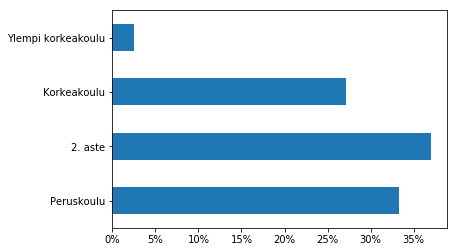

In [14]:
#Pylväskuvio, jonka pylväiden väri on käytössä olevan teeman ensimmäinen väri (C0)
#color = 'C0' määritystä ei tarvita kaikissa Pandas/Matplotlib-versioisssa
ax = df1['%'].plot.barh(color = 'C0')
#Asteikon esittäminen prosentteina on hivenen konstikasta
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

In [15]:
#Monivalintojen lukumäärät selviävät count()-funktiolla
df2=df[['työterv', 'lomaosa', 'kuntosa', 'hieroja']].count()
#Muutan series-tyyppisen listan dataframeksi ja samalla järjestän lukumäärien mukaiseen järjestykseen
df2 = df2.to_frame('n').sort_values(by = 'n', ascending = False)
#Esitetän ilman desimaaleja
df2.style.format('{:.0f}')

,n
työterv,47
hieroja,22
lomaosa,20
kuntosa,9


Text(0.5,0,'Käyttäjien lukumäärä')

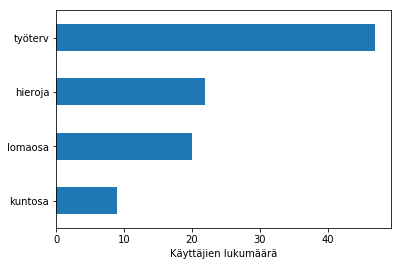

In [16]:
#Edellinen pylväinä
df2.sort_values(by = 'n').plot.barh(legend = False, color = 'C0')
plt.xlabel('Käyttäjien lukumäärä')

In [17]:
#Monivalinnat sukupuolen mukaan
df3 = df.groupby('sukup')['työterv', 'lomaosa', 'kuntosa', 'hieroja'].count()
#Sukupuolet sukup-listasta, joka määriteltiin aikaisemmin
df3.index = sukup
df3.style.format('{:.0f}')

,työterv,lomaosa,kuntosa,hieroja
Mies,35,16,8,13
Nainen,12,4,1,9


Text(0.5,0,'Käyttäjien lukumäärä')

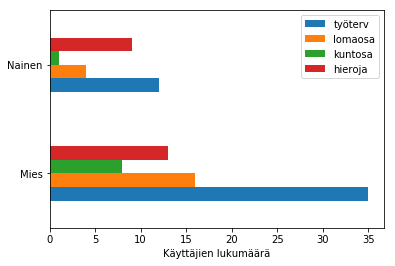

In [18]:
#Edellinen pylväinä
df3.plot.barh()
plt.xlabel('Käyttäjien lukumäärä')

In [19]:
#Ristiintaulukoinnit crosstab-toiminnolla, prosentit sarakkeiden mukaan
df4 = pd.crosstab(df['koulutus'], df['sukup'], normalize = 'columns')
#Rivi (index) ja sarake (columns) -otsikot koulutus- ja sukup-listoista
df4.index = koulutus
df4.columns = sukup
df4.style.format('{:.1%}')

,Mies,Nainen
Peruskoulu,35.5%,26.3%
2. aste,37.1%,36.8%
Korkeakoulu,24.2%,36.8%
Ylempi korkeakoulu,3.2%,0.0%


[Text(0,0,'0%'),
 Text(0,0,'5%'),
 Text(0,0,'10%'),
 Text(0,0,'15%'),
 Text(0,0,'20%'),
 Text(0,0,'25%'),
 Text(0,0,'30%'),
 Text(0,0,'35%'),
 Text(0,0,'40%')]

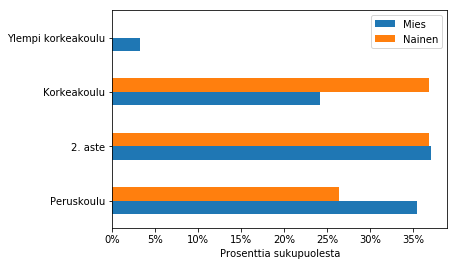

In [20]:
#Edellinen pylväinä
ax = df4.plot.barh()
plt.xlabel('Prosenttia sukupuolesta')
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

[Text(0,0,'0%'),
 Text(0,0,'20%'),
 Text(0,0,'40%'),
 Text(0,0,'60%'),
 Text(0,0,'80%'),
 Text(0,0,'100%'),
 Text(0,0,'120%')]

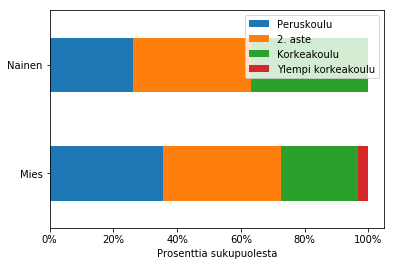

In [21]:
#Edellinen 100 % pinottuina vaakapylväinä, transpose vaihtaa arvosarjat ja kategoriat päittäin
ax = df4.transpose().plot.barh(stacked = True)
plt.xlabel('Prosenttia sukupuolesta')
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

In [22]:
#Lasken lukumääriä value_counts()-funktiolla ja muutan tuloksen dataframeksi
df5 = df['johto'].value_counts(sort = False, normalize = True).to_frame()
#Lisään dataframeen uusia sarakkeita
df5['työtov'] = df['työtov'].value_counts(sort = False, normalize = True)
df5['työymp'] = df['työymp'].value_counts(sort = False, normalize = True)
df5['palkkat'] = df['palkkat'].value_counts(sort = False, normalize = True)
df5['työteht'] = df['työteht'].value_counts(sort = False, normalize = True)
#Riviotsikot aiemmin määritellystä tyytyväisyys-listasta
df5.index = tyytyväisyys
df5.style.format('{:.1%}')

,johto,työtov,työymp,palkkat,työteht
Erittäin tyytymätön,8.5%,nan%,11.0%,40.2%,6.1%
Jokseenkin tyytymätön,19.5%,3.7%,11.0%,23.2%,18.3%
Ei tyytymätön eikä tyytyväinen,36.6%,19.8%,36.6%,23.2%,35.4%
Jokseenkin tyytyväinen,28.0%,43.2%,28.0%,12.2%,30.5%
Erittäin tyytyväinen,7.3%,33.3%,13.4%,1.2%,9.8%


[Text(0,0,'0%'),
 Text(0,0,'20%'),
 Text(0,0,'40%'),
 Text(0,0,'60%'),
 Text(0,0,'80%'),
 Text(0,0,'100%'),
 Text(0,0,'120%')]

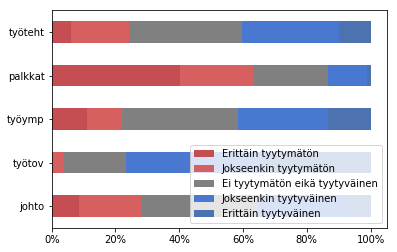

In [23]:
#Edellinen 100 % pinottuina pylväinä; värit voin itse määritellä
ax = df5.transpose().plot.barh(stacked = True, color=['#C44E52','#D65F5F','grey','#4878CF','#4C72B0'])
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

In [24]:
#Määrittelen luokkarajat palkan luokittelemiseksi
bins = [1000, 2000, 3000, 4000, 7000]
#Lisään aineistoon ikäluokka-sarakkee
df['palkkaluokka'] = pd.cut(df['palkka'], bins = bins)
#Palkkaluokkiin kuuluvien lukumäärät
df6 = pd.crosstab(df['palkkaluokka'], 'n')
df6.columns.name = ''
df6

,n
palkkaluokka,
"(1000, 2000]",19
"(2000, 3000]",50
"(3000, 4000]",8
"(4000, 7000]",5


Text(0,0.5,'Lukumäärä')

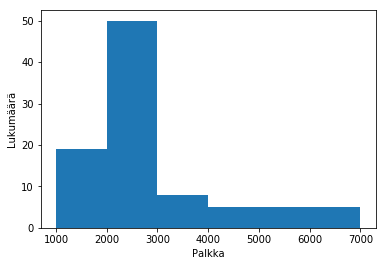

In [25]:
#Palkan luokittelu histogrammina
df['palkka'].plot.hist(bins)
plt.xlabel('Palkka')
plt.ylabel('Lukumäärä')

In [26]:
#Tunnuslukuja kahden desimaalin tarkkuudella
df[['ikä', 'palveluv', 'palkka', 'johto', 'työtov', 'työymp', 'palkkat', 'työteht']].describe().style.format('{:.2f}')

,ikä,palveluv,palkka,johto,työtov,työymp,palkkat,työteht
count,82.00,80.00,82.00,82.00,81.00,82.00,82.00,82.00
mean,37.95,12.18,2563.88,3.06,4.06,3.22,2.11,3.20
std,9.77,8.81,849.35,1.06,0.83,1.15,1.11,1.05
min,20.00,0.00,1521.00,1.00,2.00,1.00,1.00,1.00
25%,31.00,3.75,2027.00,2.00,4.00,3.00,1.00,3.00
50%,37.50,12.50,2320.00,3.00,4.00,3.00,2.00,3.00
75%,44.00,18.25,2808.00,4.00,5.00,4.00,3.00,4.00
max,61.00,36.00,6278.00,5.00,5.00,5.00,5.00,5.00


In [27]:
#pivot_table tuottaa oletuksena keskiarvoja
df7 = df.pivot_table(values = 'palkka', index = ['sukup', 'perhe'], columns = 'koulutus')
df7.style.format('{:.0f}')

In [28]:
#Hierarkisen indeksin arvot aiemmin määritellyistä sukup- ja perhe-listoista
df7.index = df7.index.set_levels(sukup, level=0)
df7.index = df7.index.set_levels(perhe, level=1)
df7.columns = koulutus
df7.style.format('{:.0f}')

In [29]:
#pivot-taulukossa voi käyttää monenlaisia funktioita
df8 = df.pivot_table(values = 'palkka', index = 'koulutus', aggfunc = [np.min, np.median, np.mean, np.max])
df8.index = koulutus
df8.columns = ['pienin', 'mediaani', 'keskiarvo', 'suurin']
df8.style.format('{:.0f}')

,pienin,mediaani,keskiarvo,suurin
Peruskoulu,1638,2144,2310,3587
2. aste,1521,2378,2403,3510
Korkeakoulu,1559,2710,2887,6278
Ylempi korkeakoulu,5069,5147,5147,5225


[Text(0,0,'Peruskoulu'),
 Text(0,0,'2. aste'),
 Text(0,0,'Korkeakoulu'),
 Text(0,0,'Ylempi korkeakoulu')]

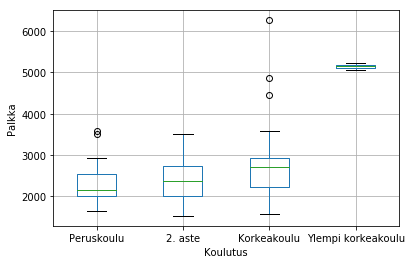

In [30]:
#Ruutu- ja janakaavio on kätevä jakaumien vertailussa
ax = df.boxplot('palkka', by = 'koulutus')
#boxplot tuottaa otsikoita, jotka poistan
plt.title('')
plt.suptitle('')
plt.xlabel('Koulutus')
plt.ylabel('Palkka')
ax.set_xticklabels(koulutus)

In [31]:
#Korrelaatiokertoimia kahden desimaalin tarkkuudella
df[['ikä', 'palveluv', 'palkka']].corr().style.format('{:.2f}')

,ikä,palveluv,palkka
ikä,1.00,0.53,0.30
palveluv,0.53,1.00,0.24
palkka,0.30,0.24,1.00


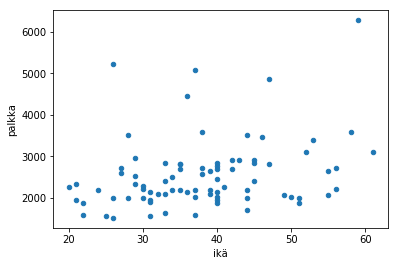

In [32]:
#Iän ja palkan riippuvuus hajontakaaviona
df.plot.scatter('ikä', 'palkka')